## KMeans vs GMM on generated dataset

We can use sklearn's make_blobs function to create a dataset of Gaussian blobs:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import mixture, cluster, datasets

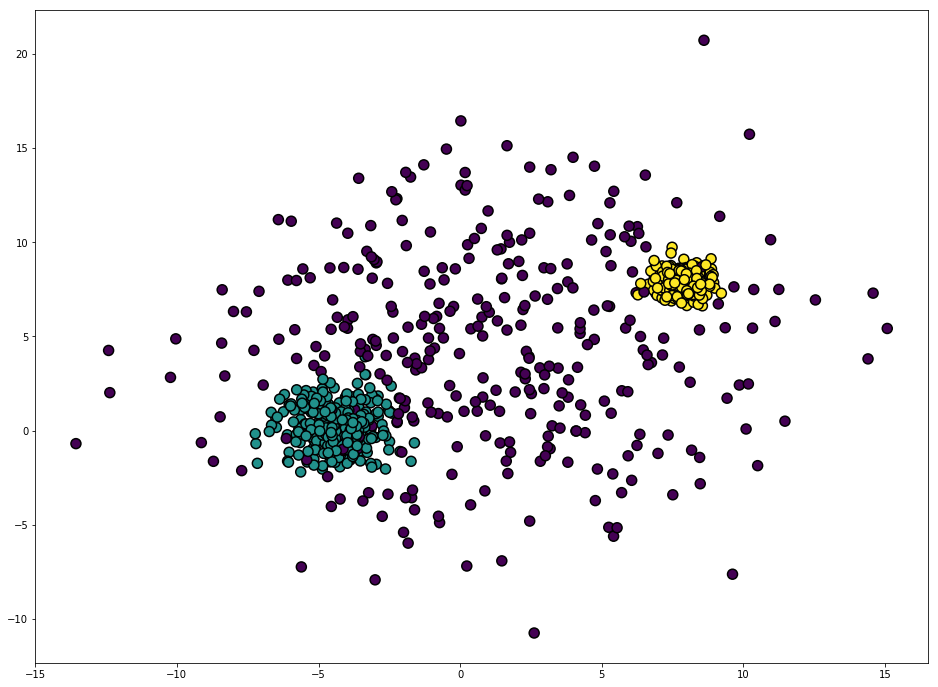

In [2]:
n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[5, 1, 0.5], random_state=3)

X, y = varied[0], varied[1]

plt.figure(figsize=(16, 12))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

Now when we hand off this dataset to the clustering algorithms, we obviously will not pass in the labels. So let's start with KMeans and see how it does with the dataset. WIll it be to produce clusters that match the original labels?

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X)

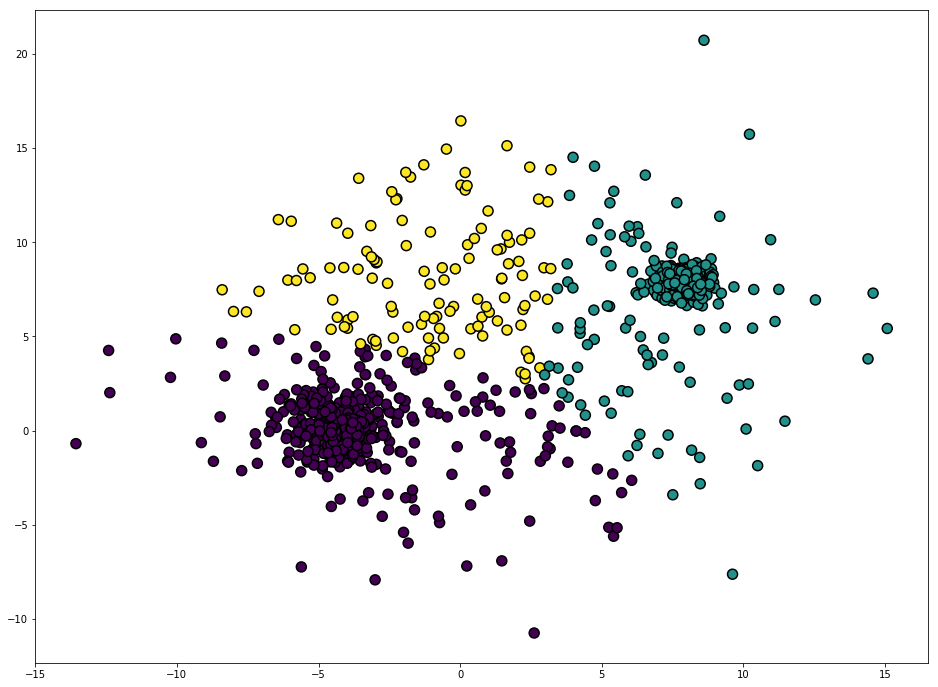

In [4]:
plt.figure(figsize=(16, 12))
plt.scatter(X[:, 0], X[:, 1], c=pred, edgecolors='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

Let us now try clustering with GaussianMixture:

In [5]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm = gmm.fit(X)

pred_gmm = gmm.predict(X)

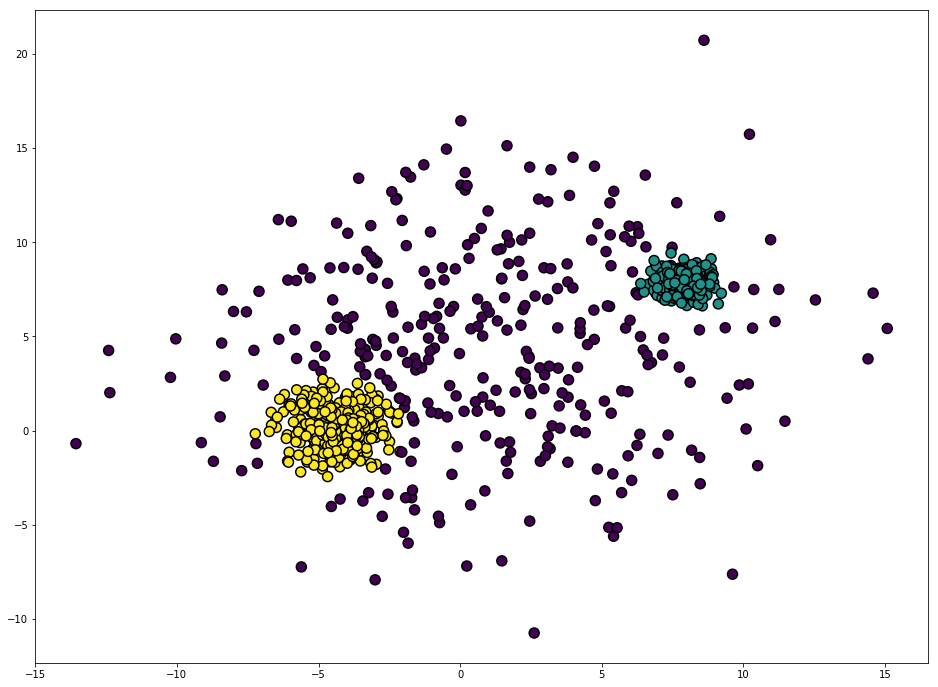

In [6]:
plt.figure(figsize=(16, 12))
plt.scatter(X[:, 0], X[:, 1], c=pred_gmm, edgecolors='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

## KMeans vs GMM on The Iris Dataset

For our second example, we'll take a dataset that has more than two features. The Iris dataset is great for this purpose since it is reasonable to assume it's distributed according to Gaussian distributions.

The Iris dataset is a labeled dataset with four features:

In [7]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


How do you visualize a datset with four dimensions? 

There are a few ways (e.g. [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), or [project into a lower number number dimensions using PCA](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py)). Let's attempt to visualize using PairGrid because it does not distort the dataset -- it merely plots every pair of features against each other in a subplot:

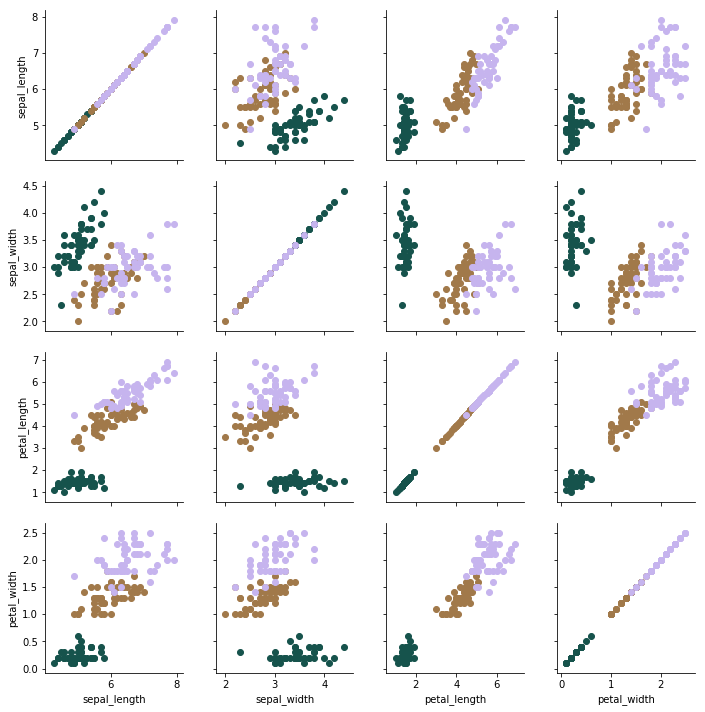

In [8]:
g = sns.PairGrid(iris, hue="species", palette=sns.color_palette("cubehelix", 3), 
                 vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

If we cluster the Iris datset using KMeans, how close would the resulting clusters match the original labels?

In [9]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

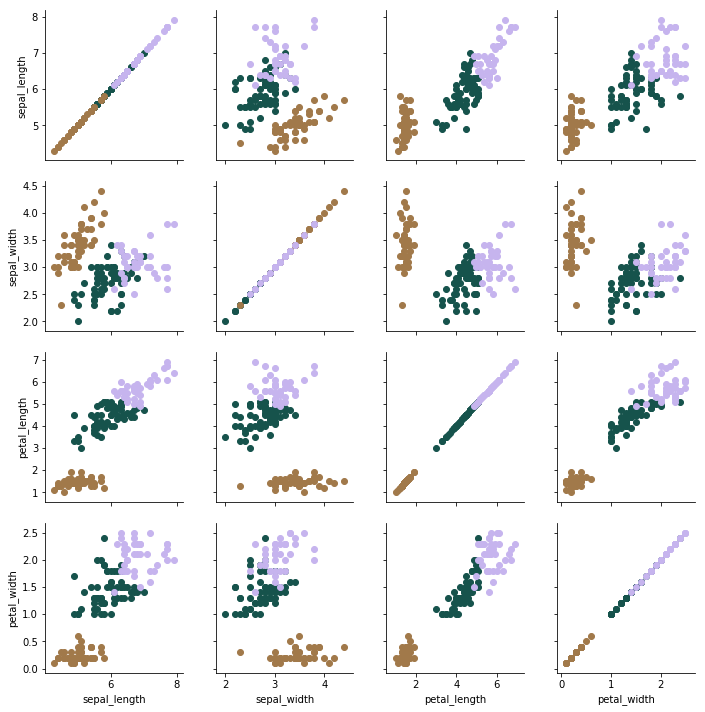

In [10]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue='kmeans_pred', palette=sns.color_palette("cubehelix", 3),
                 vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

How do these clusters match the original labels?

You can clearly see that visual inspection is no longer useful if we're working with multiple dimensions like this. So how can we evaluate the clustering result versus the original labels? 

You guessed it. We can use an external cluster validation index such as the [adjusted Rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) which generates a score between -1 and 1 (where an exact match will be scored as 1).

In [11]:
from sklearn.metrics import  adjusted_rand_score

iris_kmeans_score = adjusted_rand_score(iris['species'], pred_kmeans_iris)
iris_kmeans_score

0.7302382722834697

In [12]:
gmm_iris = GaussianMixture(n_components=3)
gmm_iris = gmm_iris.fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])

pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [13]:
iris['gmm_pred'] = pred_gmm_iris

iris_gmm_score = adjusted_rand_score(iris['species'], pred_gmm_iris)

iris_gmm_score

0.9038742317748124